In [1]:
import numpy as np
import pandas as pd

from tsoutliers import SmootherAD

### Monthly sales

In [2]:
sales = pd.read_csv('./dataset/monthly_sale.csv', index_col='month', parse_dates=True)['sales']

In [27]:
sales.index.freq='MS'

<AxesSubplot:xlabel='month'>

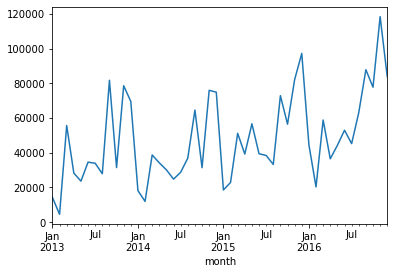

In [3]:
sales.plot()

Zero denominator in linear smooth. This usually indicates that the input contains duplicate points.


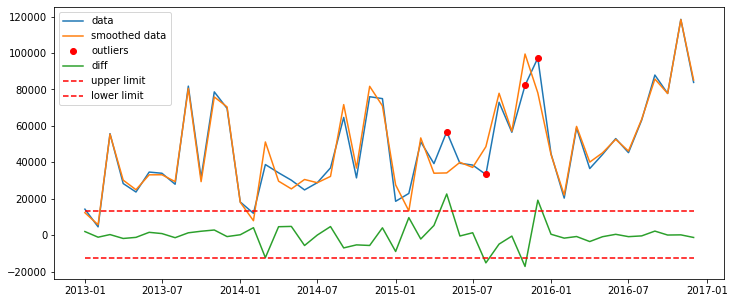

In [4]:
outliers = SmootherAD(seasadj=True).detect(sales, is_plot=True)

### Average temperature India

In [5]:
temp = pd.read_csv('./dataset/average_temp_india.csv', index_col='date', parse_dates=True)['values']

<AxesSubplot:xlabel='date'>

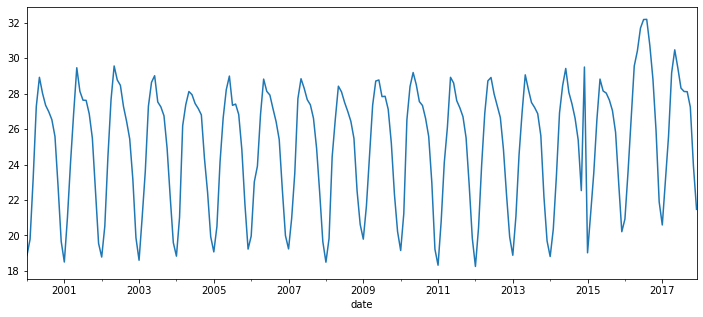

In [6]:
temp.plot()

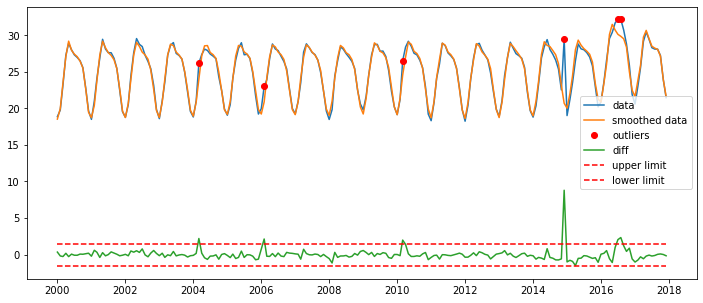

In [53]:
outliers = SmootherAD(seasadj=True).detect(temp, is_plot=True)

In [45]:
from statsmodels.tsa.api import ETSModel, STL
import matplotlib.pyplot as plt

34278837895.59601 1174.3607709881182 1184.4561822879086


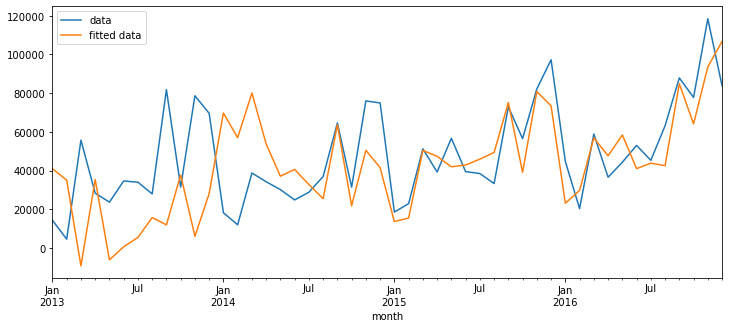

In [44]:
fit = ETSModel(sales, error='add', trend='add', seasonal='add').fit()
# fit = ETSModel(sales).fit()

sales.plot(label='data')
fit.fittedvalues.plot(label='fitted data')
plt.legend()

print(fit.sse, fit.aicc, fit.bic)

/Users/baicheng/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/Users/baicheng/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


5033977301.744151 942.0634171566209 948.4164264345953


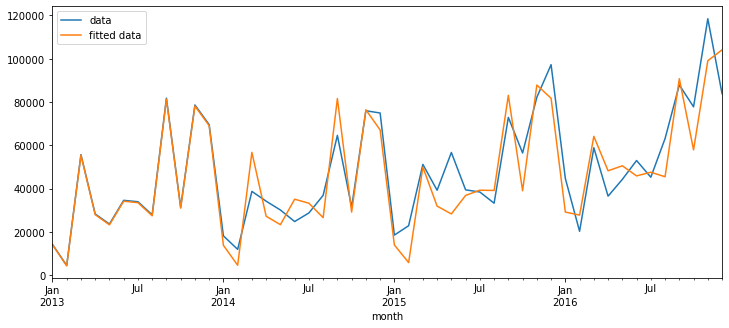

In [51]:
fit = ExponentialSmoothing(sales, trend='add', seasonal='add').fit()
# fit = ExponentialSmoothing(sales, trend='add').fit()

sales.plot(label='data')
fit.fittedvalues.plot(label='fitted data')
plt.legend()

print(fit.sse, fit.aicc, fit.bic)

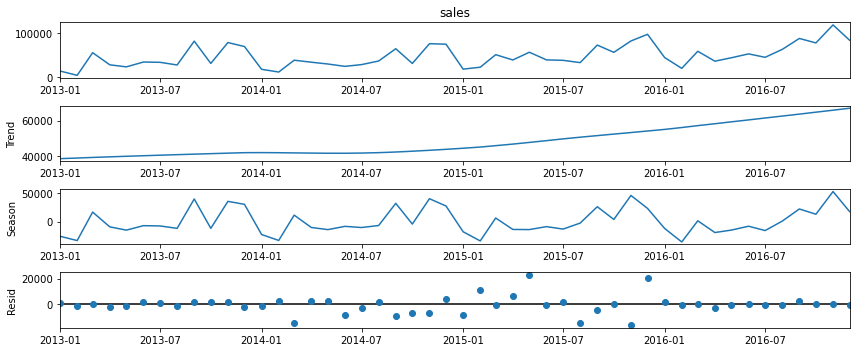

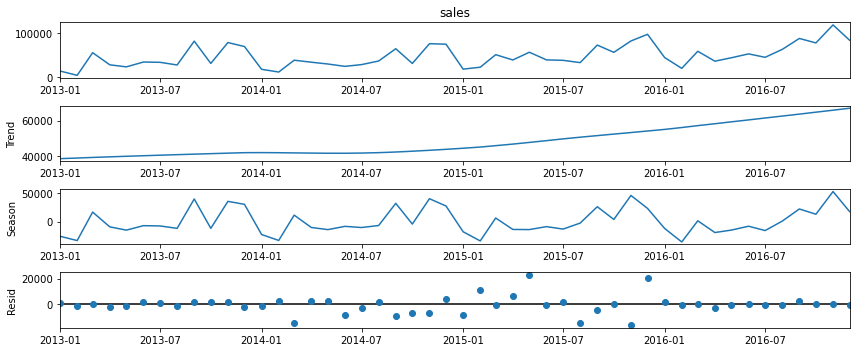

In [31]:
stl = STL(sales, robust=True).fit()
stl.plot()

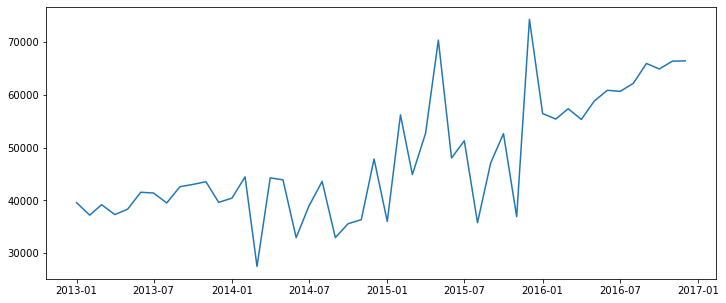

In [33]:
plt.plot(stl.resid + stl.trend)

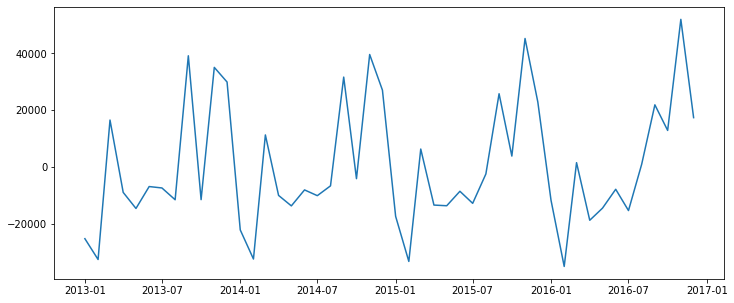

In [34]:
plt.plot(stl.seasonal)